In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


## TAKS 3. Exploiting Correlation

### 3.a. Generate 5 uncorrelated Gaussian random variables that simulate yield changes (they can be positive or negative with a mean close to 0 and a standard deviation that is small).

To generate 5 uncorrelated Gaussian random variables we use `numpy.random.randn()`. We choose mean = 0.001 and std = 0.1 to meet the requirements. Let's simulate a daily yield change over a 6 month period (180 days) to match with section 3.e.


In [11]:
# Parameters
n_samples = 180
n_assets = 5
mean = 0.001
std = 0.1

# Generate yield changes
yield_changes1 = np.random.randn(n_samples, n_assets) * std + mean

# Create a dataframe
yield_changes_df1 = pd.DataFrame(yield_changes1, columns=[f'asset_{i}' for i in range(n_assets)])
yield_changes_df1.head()


,asset_0,asset_1,asset_2,asset_3,asset_4
0,0.099757,0.034862,-0.091323,-0.035406,-0.024095
1,0.039477,-0.025544,0.012068,-0.095818,-0.043994
2,0.011219,-0.038973,0.200704,0.145038,0.052668
3,0.013800,-0.127903,0.049933,-0.135731,0.063506
4,0.053163,-0.069911,0.178559,-0.209741,-0.015474


In [12]:
# Get some statistics from the dataframe
yield_changes_df1.describe()

,asset_0,asset_1,asset_2,asset_3,asset_4
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-0.005511,-0.002123,0.003359,-0.000143,0.014189
std,0.097606,0.100714,0.098546,0.097111,0.103341
min,-0.302368,-0.306582,-0.256568,-0.250628,-0.273262
25%,-0.069702,-0.071698,-0.058275,-0.072002,-0.048684
50%,0.001584,-0.010142,0.010782,-0.001743,0.014332
75%,0.059408,0.061354,0.063983,0.078371,0.075638
max,0.250905,0.319419,0.233191,0.265713,0.286926


### 3.b. Run a Principal Components using EITHER the correlation OR covariance matrix.

Since the data is uncorrelated and they come from the same distribution, we can use covariance matrix to run the PCA.

However, we chose to use the correlation matrix to make the analysis more general. Instead of calculating the correlatin matrix explicitly, we standardize the data (mean = 0 and std = 1) and apply PCA on it. To standaridize the data, we use the `StandardScaler()` class from `sklearn.preprocessing`.

In [14]:
# Instantiate the scaler
scaler1 = StandardScaler()
# Fit and transform the data
scaled_yield_changes1 = scaler1.fit_transform(yield_changes1)
print('Scaled yield changes mean: ', scaled_yield_changes1.mean())
print('Scaled yield changes std: ', scaled_yield_changes1.std())

Scaled yield changes mean:  4.934324553889585e-19
Scaled yield changes std:  0.9999999999999999


We can see that scaled_yield_changes1 has a mean close to 0 and a std close to 1. Now we can run the PCA. We do it by using the `PCA()` class from `sklearn.decomposition`. We use `n_components=n_assets` to ensure that the number of principal components is equal to the number of original variables.

In [15]:
# Instantiate the PCA
pca1 = PCA()
# Fit the data
pca_yield_changes1 = pca1.fit(scaled_yield_changes1)


The object `pca_yield_changes1` has been fit to the data and contain information about the principal components. Since Section 3.c asks for the amount of variance explained by each principal component, we can use the `explained_variance_ratio_` and `explained_variance_` attributes of the object.

In [23]:
# Extract explained variance
explained_variance1 = pca_yield_changes1.explained_variance_
explained_variance_ratio1 = pca_yield_changes1.explained_variance_ratio_

print('explained_variance1: ', explained_variance1)
print('explained_variance_ratio1: ', explained_variance_ratio1)

# Percentage of variance explained
variance_explained_perc1 = explained_variance_ratio1 * 100
print("Variance explained by each component:")
for i, var in enumerate(variance_explained_perc1, 1):
    print(f"Component {i}: {var:.2f}%")

explained_variance1:  [1.29197518 1.04488574 0.92509534 0.91183644 0.85414026]
explained_variance_ratio1:  [0.25695951 0.20781616 0.18399118 0.18135414 0.16987901]
Variance explained by each component:
Component 1: 25.70%
Component 2: 20.78%
Component 3: 18.40%
Component 4: 18.14%
Component 5: 16.99%


### 3.c. Write a paragraph explaining how the variances of each component compare with each other. In this paragraph, you will address the following question: how much variance is explained by Component 1, Component 2, Component 3?

This section is answered in the report pdf file.

Answer from Grok: In this simulated dataset, the five securities are uncorrelated and have identical variances (standard deviation of 0.01). PCA decomposes the data into five principal components, each representing a direction of variance. Because there’s no correlation, the total variance is evenly distributed across the components. Component 1 explains 21.12%, Component 2 explains 20.54%, and Component 3 explains 19.74%, with the remaining two components similarly close to 20%. The slight variations (e.g., 21.12% vs. 19.28%) arise from random sampling noise in the finite dataset. Ideally, with infinite uncorrelated data of equal variance, each component would explain exactly 20% (100% / 5). This near-equal distribution confirms that no si

### 3.d. Produce a screeplot (see https://en.wikipedia.org/wiki/Scree_plot) of the variance explained for each component.

According to the provided wikipedia page, "a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis" and it "always displays the eigenvalues in a downward curve, ordering the eigenvalues from largest to smallest". The attribute `explained_variance_` of the `PCA` object contains the eigenvalues of the principal components in a descending order. Therefore, to plot the scree plot, we plot the `explained_variance_` against the number of the principal component.

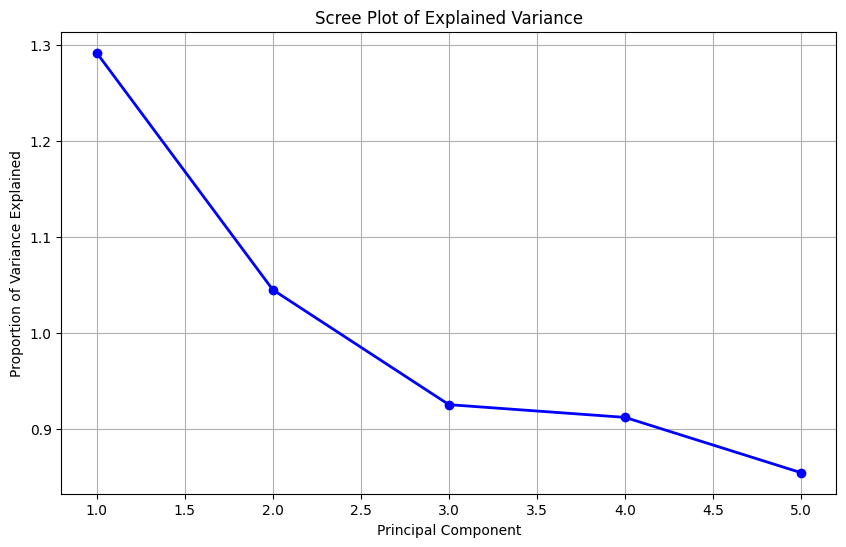

In [28]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance1) + 1), explained_variance1, 'bo-', linewidth=2)
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()
